In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import quantumpropagator as qp
from quantumpropagator import readWholeH5toDict, abs2
#from __future__ import print_function
from ipywidgets import interact#, interactive, fixed, interact_manual
import ipywidgets as widgets


ImportError: cannot import name 'version_Cpropagator'

In [129]:
fol = '/home/alessio/m-dynamicshere/results'
subfolders = sorted([dir for dir in os.listdir(fol) if os.path.isdir(os.path.join(fol,dir)) and dir != os.path.join(fol,'.ipynb_checkpoints')])
print(''.join(['{} -> {}\n'.format(a,b) for a,b in enumerate(subfolders)]))

0 -> 1_2_nac_THETA_0000
1 -> 1_2_nac_THETA_0001
2 -> 1_2_nac_THETA_0002
3 -> 1_2_nac_THETA_0003
4 -> 1_2_nac_THETA_0004
5 -> 1_2_nac_THETA_0005
6 -> 1_2_nac_THETA_0006
7 -> 1_2_nac_THETA_0007
8 -> 1_2_nac_THETA_0008
9 -> 1_2_nac_THETA_0009
10 -> 1_2_nac_THETA_0010
11 -> 1_2_nac_THETA_0011
12 -> 1_2_nac_THETA_0012
13 -> 3d_1_2_nac_0000_good
14 -> q-smallerDT_0000
15 -> q-smallerDT_0001
16 -> w-retryhere_0000
17 -> w-smaldtreally_0000



In [149]:
interactive = True
%matplotlib notebook
subfolder = subfolders[-1]
subfolder = subfolders[11]

In [150]:
a = os.path.join(fol,subfolder)
filesList = [ fn for fn in sorted(os.listdir(a)) if fn[:8] == 'Gaussian' and fn[-3:] == '.h5']
outh5 = os.path.join(a,'allInput.h5')
dictio = readWholeH5toDict(outh5)
kind = dictio['kind']
phis,gams,thes = dictio['phis'],dictio['gams'],dictio['thes']
lastV = len(filesList)-1

In [151]:
kind
if kind != 'The' and kind != 'Phi' and kind != 'Gam':
    qp.err('This is 1D notebook !!!')

# 1d slices

In [152]:
filesN = len(filesList)
dime,nstates = (qp.retrieve_hdf5_data(os.path.join(a,filesList[0]),'WF')).shape
allwf = np.empty((filesN,dime,nstates),dtype=complex)
alltime = np.empty((filesN))
if kind == 'Phi':
    dim = phis
elif kind == 'Gam':
    dim = gams
elif kind == 'The':
    dim = thes

In [153]:
for i,fn in enumerate(filesList):
    fnn = os.path.join(a,fn)
    allwf[i] = qp.retrieve_hdf5_data(fnn,'WF')
    alltime[i] = qp.retrieve_hdf5_data(fnn,'Time')[0]
    

In [154]:
outfn = os.path.join(a,'output')
outfnP = os.path.join(a,'outputPopul')
data = pd.read_csv(outfn, delim_whitespace=True, header=None);
dataP = pd.read_csv(outfnP, delim_whitespace=True, header=None);
data.columns = ['count','steps','fs','Norm Deviation','Kinetic','Potential','Total','Total deviation','Xpulse','Ypulse','Zpulse']
result = pd.concat([data, dataP], axis=1)

<IPython.core.display.Javascript object>


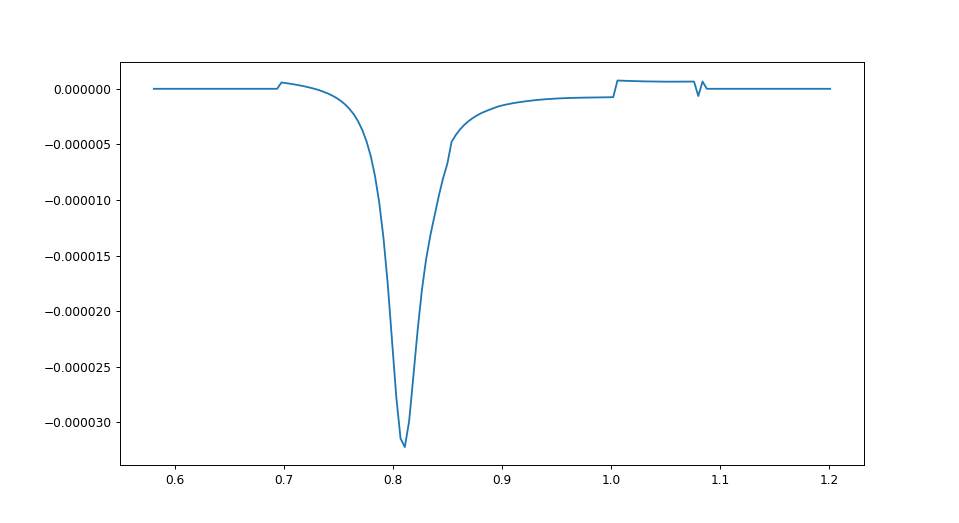

In [155]:
def plotDim1D(i,magni,save=None):
    wf = allwf[i]
    fig = plt.figure(figsize=(11, 6), dpi= 80, facecolor='w', edgecolor='k')
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'mediumpurple']
    save = save or False
    
    #fig = plt.figure(figsize=(15,15))
    
    all_states_indexes = np.arange(nstates)
    time = alltime[i]
    plt.title('{} - Time = {:10.5f} fs'.format(kind,time))
    ax1 = fig.add_subplot(2,2,1)
    potential = qp.fromHartoEv(dictio['potCube'])
    
    ax1.plot(dim, potential, linewidth=1,ls='-')
    
    for state in all_states_indexes:
        ax1 = fig.add_subplot(2,2,2+state)
        initialEne = result['Total'][0]
        ys = wf[:,state]
        realPart = np.real(ys)*magni + initialEne
        imagPart = np.imag(ys)*magni + initialEne
        absPart = abs2(ys)*magni + initialEne
        
        ax1.plot(dim, potential[:,state],linewidth=1,ls='-')
        ax1.plot(dim, realPart, linewidth=1,ls='--')
        ax1.plot(dim, imagPart, linewidth=1,ls='--')
        ax1.plot(dim, absPart, linewidth=3,ls='-')
    fig.tight_layout()
    
    if save:
        name_fig = '1D_Wavefunction{:04d}.png'.format(i)
        fig.savefig(name_fig)
    
    
def fdim(file_number,magni):
    return plotDim1D(file_number,magni)

#visualize NAC along here
ah = dictio['nacCube'][:,0,1,2]
fig = plt.figure(figsize=(11, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(thes,ah);

In [156]:
if interactive:
    interact(fdim, file_number = widgets.IntSlider(min=0,max=lastV,step=1,value=lastV), magni = widgets.IntSlider(min=1,max=20,step=1,value=2));
else:
    magni = 2
    print('initial')
    fdim(0,magni)
    print('final')
    fdim(lastV,magni)
    
savefigures = False
if savefigures:
    for i in range(lastV):
        plotDim1D(i,4,True)
        

interactive(children=(IntSlider(value=500, description='file_number', max=500), IntSlider(value=2, description…

In [138]:
def kinGam(xder):
    pd.DataFrame(dictio['kinCube'][:,4,xder]).plot(x=dim,figsize=(11, 6))
    
interact(kinGam, xder = widgets.IntSlider(min=0,max=2,step=1,value=0));

interactive(children=(IntSlider(value=0, description='xder', max=2), Output()), _dom_classes=('widget-interact…

In [139]:
result

,count,steps,fs,Norm Deviation,Kinetic,Potential,Total,Total deviation,Xpulse,Ypulse,Zpulse,0,1,2
0,0,0,0.000000,1.110223e-16,0.011704,6.538867,6.550571,0.000000,0.0,0.0,0.0,0.0000,0.000000e+00,1.000000
1,1,100,0.100099,-8.169660e-07,0.011792,6.538788,6.550580,-0.000009,0.0,0.0,0.0,0.1001,7.805840e-07,1.000000
2,2,200,0.200199,-3.209656e-06,0.012057,6.538550,6.550607,-0.000036,0.0,0.0,0.0,0.2002,3.065550e-06,1.000000
3,3,300,0.300298,-7.007975e-06,0.012499,6.538151,6.550650,-0.000079,0.0,0.0,0.0,0.3003,6.688970e-06,1.000010
4,4,400,0.400397,-1.194317e-05,0.013118,6.537588,6.550706,-0.000135,0.0,0.0,0.0,0.4004,1.138870e-05,1.000010
5,5,500,0.500496,-1.766864e-05,0.013913,6.536858,6.550771,-0.000200,0.0,0.0,0.0,0.5005,1.682640e-05,1.000020
6,6,600,0.600596,-2.378658e-05,0.014885,6.535956,6.550840,-0.000269,0.0,0.0,0.0,0.6006,2.261350e-05,1.000020
7,7,700,0.700695,-2.987831e-05,0.016033,6.534877,6.550909,-0.000338,0.0,0.0,0.0,0.7007,2.834040e-05,1.000030
8,8,800,0.800794,-3.553589e-05,0.017357,6.533617,6.550973,-0.000402,0.0,0.0,0.0,0.8008,3.360660e-05,1.000040
9,9,900,0.900893,-4.039251e-05,0.018857,6.532172,6.551029,-0.000458,0.0,0.0,0.0,0.9009,3.804980e-05,1.000040


<IPython.core.display.Javascript object>


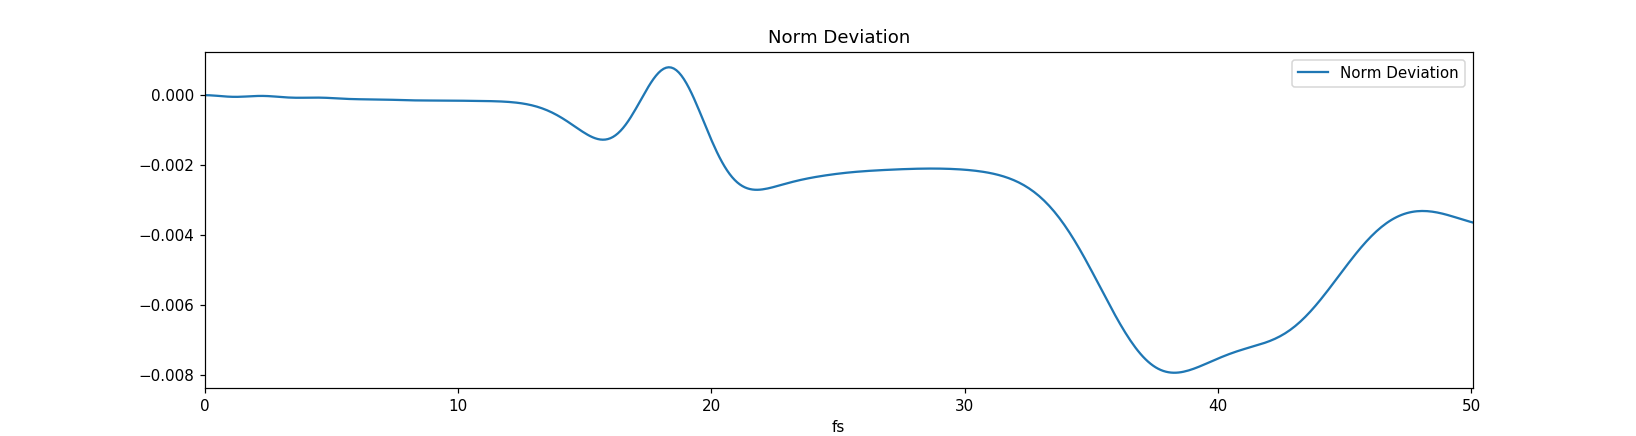

<IPython.core.display.Javascript object>


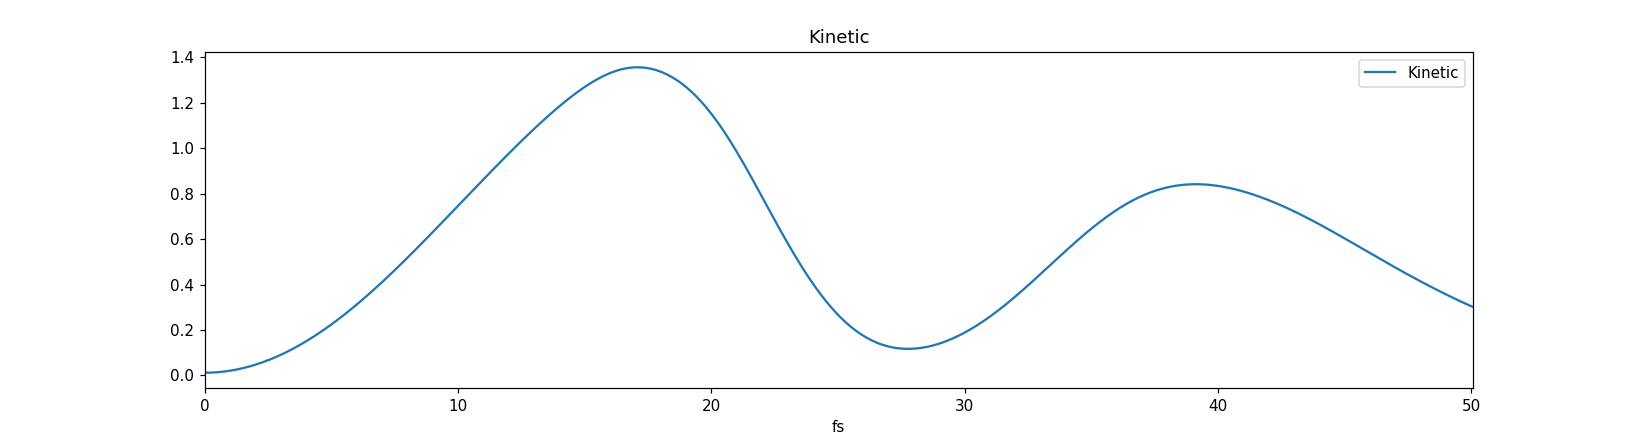

<IPython.core.display.Javascript object>


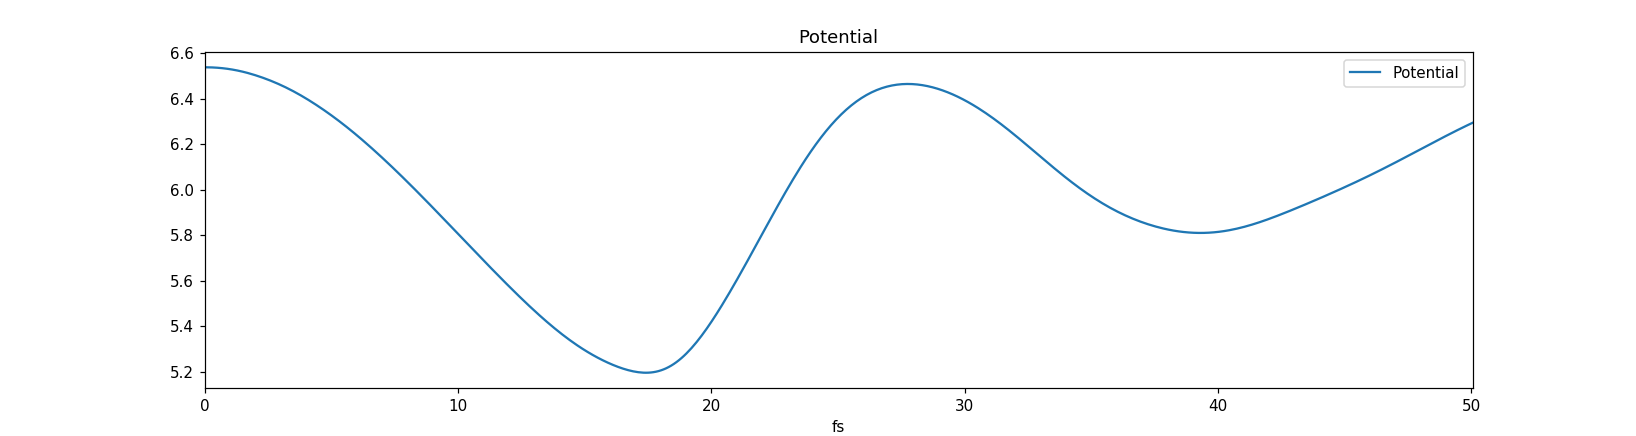

<IPython.core.display.Javascript object>


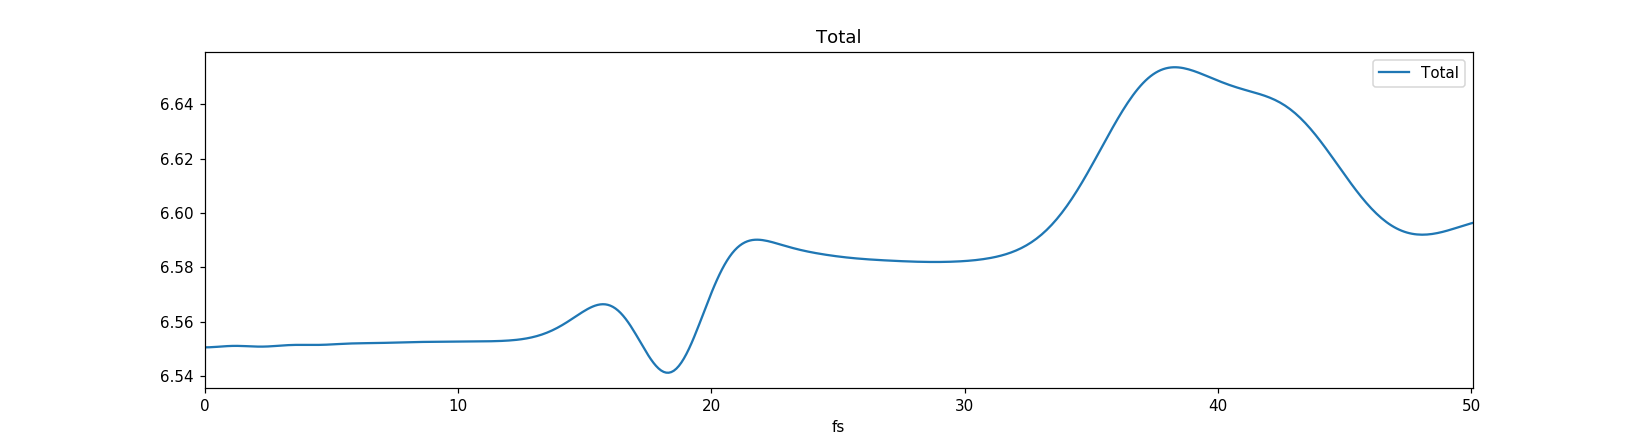

In [140]:
data.plot(title = 'Norm Deviation', x='fs', y = 'Norm Deviation', figsize=(15,4));
data.plot(title = 'Kinetic', x='fs', y = 'Kinetic', figsize=(15,4));
data.plot(title = 'Potential', x='fs', y = 'Potential', figsize=(15,4));
data.plot(title = 'Total', x='fs', y = 'Total', figsize=(15,4));

<IPython.core.display.Javascript object>


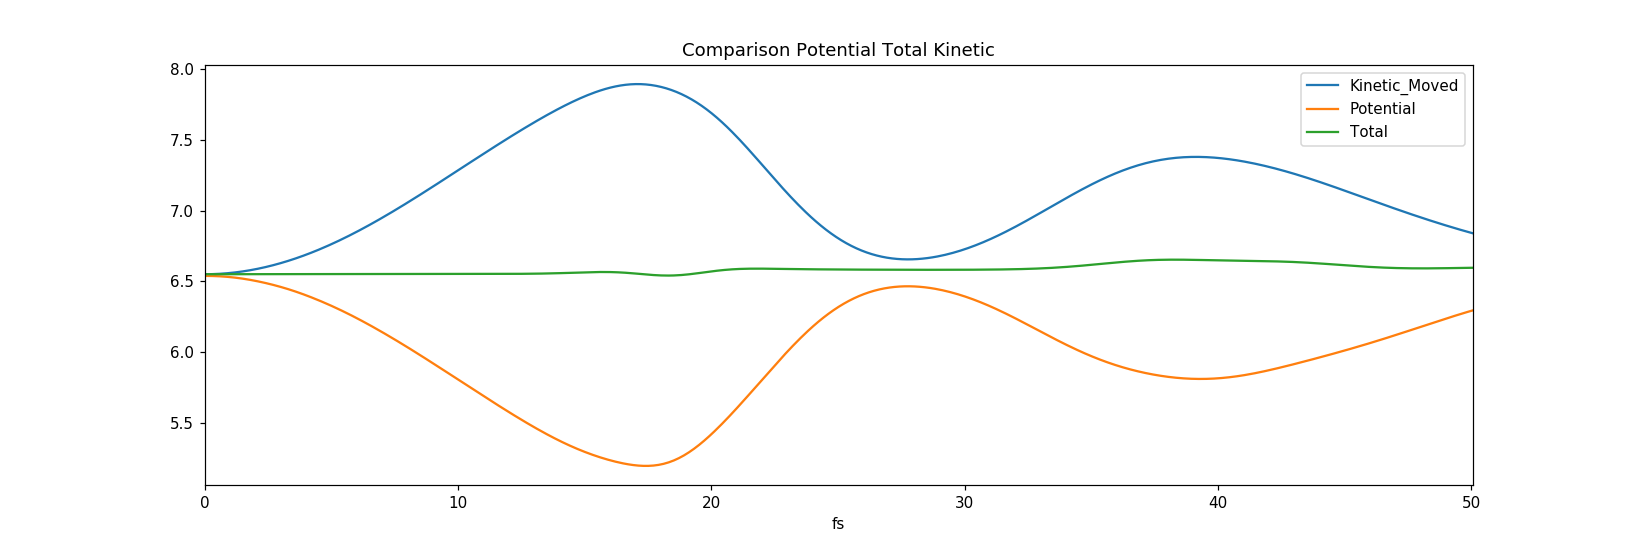

In [93]:
data['Kinetic_Moved'] = data['Kinetic'] + data['Potential'][0]
data.plot(title = 'Comparison Potential Total Kinetic', x=['fs'] ,y=['Kinetic_Moved','Potential','Total'], figsize=(15,5));

<IPython.core.display.Javascript object>


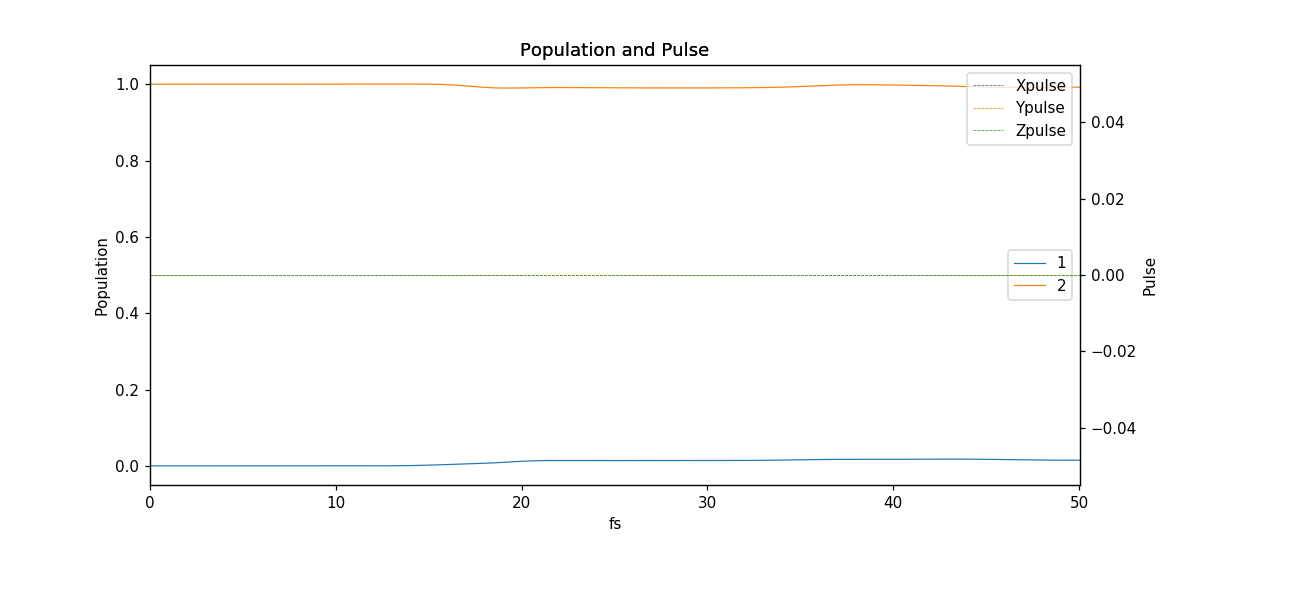

In [94]:
fig = plt.figure(figsize=(11,5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax1.set_ylabel('Population')
ax2.set_ylabel('Pulse')
popul = np.arange(nstates)+1
result.plot(title = 'Population and Pulse', ax = ax1,  x=['fs'] ,y=popul, linewidth=0.8)
result.plot(title = 'Population and Pulse', ax = ax2,  x=['fs'] ,y=['Xpulse','Ypulse','Zpulse'], linewidth=0.5, ls='--');

## Expected Value

In [95]:
def expected_1d(i):
    wf = allwf[i]
    time = alltime[i]
    print('  Time: {:5.2f} fs'.format(time))
    _,nstates = wf.shape
    for i in range(nstates):
        wfState = wf[:,i]
        popu = np.linalg.norm(wfState) # this is norm, the real popu is this squared
        if popu == 0:
            print('  Expected Values State {}:\n  Popul: {:10.3f} \n    {}: - \n'.format(i, popu**2,kind))
        else:
            wfA = abs2(wfState/popu)
            dimA = sum([ wfA[i] * dim[i] for i in range(wfA.size) ])
            print('  Expected Values State {}:\n  Popul: {:10.3f} \n    {}:   {:10.3f} \n'.format(i, popu**2, kind, dimA))

if interactive:
    interact(expected_1d, i = widgets.IntSlider(min=0,max=lastV,step=1,value=lastV));
else:
    print('First Step:')
    expected_1d(0)
    print('Last Step:')
    expected_1d(lastV)

interactive(children=(IntSlider(value=500, description='i', max=500), Output()), _dom_classes=('widget-interac…

## Borders amplitudes

In [96]:
def border(i):
    left  = abs2(allwf[i,0])
    right = abs2(allwf[i,-1])
    print('Border Population:\nLeft  {}\nRight {}'.format(left,right))
    
if interactive:
    interact(border, i = widgets.IntSlider(min=0,max=lastV,step=1,value=lastV));
else:
    print('First Step:')
    border(0)
    print('Last Step:')
    border(lastV)

interactive(children=(IntSlider(value=500, description='i', max=500), Output()), _dom_classes=('widget-interac…

In [116]:
# %%bash -s "$kind"
# jupyter nbconvert --to html Heatmaps1d.ipynb
# mv Heatmaps1d.html ~/Desktop/$(date +"%m_%d_%Y-%H%M%S")_${1}_Heatmaps1d.html

In [246]:
def doubleAxespoins(Y):
    N = len(Y)
    X = np.arange(0, 2*N, 2)
    X_new = np.arange(2*N-1)       # Where you want to interpolate
    Y_new = np.interp(X_new, X, Y) 
    return(Y_new)



<IPython.core.display.Javascript object>


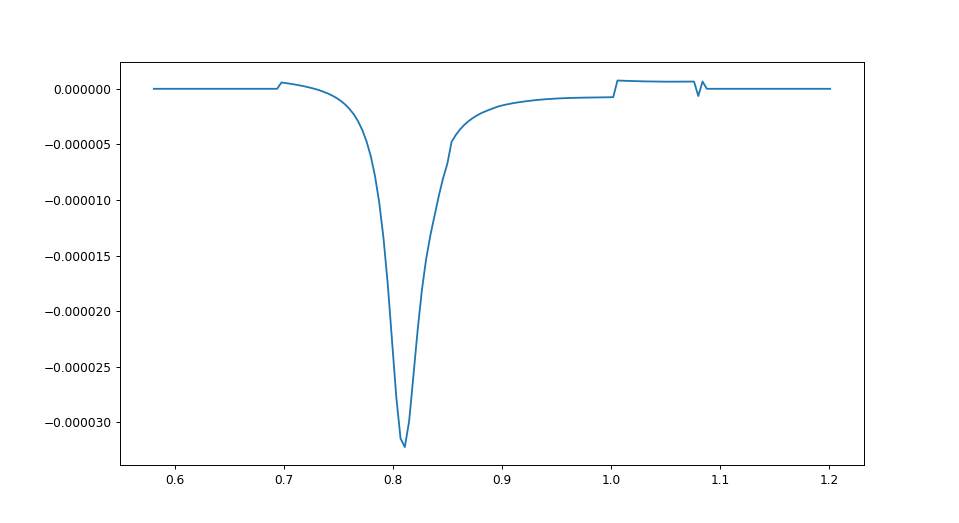

In [251]:
fig = plt.figure(figsize=(11, 6), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(doubleAxespoins(thes),doubleAxespoins(ah))